## Name: Akshaj Chainani
## PRN: 22070127008

# **Experiment-14**

# **AIM:-** Transfer Learning and fine tuning for image classification

# **Theory:**

1. Transfer Learning
What is Transfer Learning?

Transfer learning is a machine learning technique where a model developed for a task is reused as a starting point for a model on a second task.

Use of Transfer Learning:

It is used to leverage pre-trained models (trained on large datasets) for new, similar tasks, thereby reducing training time and data requirements.

Advantages over Traditional Deep Learning:

Reduced Training Time: Transfer learning significantly reduces the time required to train a model compared to training from scratch.

Improved Performance: Leveraging pre-trained models often results in better performance, especially with limited data.

Lower Data Requirements: Transfer learning can achieve good results with smaller datasets compared to traditional deep learning.
2. Computer Vision Datasets
description :

COCO Dataset (Common Objects in Context): Focuses on object detection, segmentation, and captioning. It contains a large collection of images with annotations for various objects.

ImageNet Dataset: A large-scale image database organized according to the WordNet hierarchy. Primarily used for image classification and object detection tasks.

Google Open Images Dataset: A massive dataset of images with rich annotations, including image-level labels, object bounding boxes, and visual relationships.

COCO Dataset (Common Objects in Context):

Number of Classes: 80 object categories.
Number of Images: Over 330,000 images.
ImageNet Dataset:

Number of Classes: Roughly 20,000 object categories.
Number of Images: Over 14 million images.

Google Open Images Dataset:

Number of Classes: Over 6,000 object categories.
Number of Images: Over 9 million images.
3. Transfer Learning Models and Datasets
Some popular transfer learning models for image classification and their training datasets:

VGG16, VGG19: Trained on ImageNet.

ResNet50, ResNet101, ResNet152: Trained on ImageNet.

InceptionV3: Trained on ImageNet.

MobileNetV2: Trained on ImageNet.

EfficientNet: Trained on ImageNet and other datasets.

4. Comparative Analysis
Here's a comparative analysis of some transfer learning models:

Model	Accuracy	Speed	Size

VGG16/VGG19	High	Moderate	Large

ResNet	High	Moderate	Moderate

InceptionV3	High	Fast	Moderate

MobileNetV2	Moderate	Fast	Small

EfficientNet	High	Fast	Varies

Note:

Accuracy and speed can vary based on the specific task and dataset.
Model size refers to the number of parameters and impacts memory usage and inference time.


| Model       | Architecture          | Dataset Used | Strengths                     | Weaknesses                    |
|-------------|-----------------------|--------------|-------------------------------|-------------------------------|
| **VGGNet**  | Deep CNN with small filters | Imagenet     | Simplicity, good performance  | High computational cost, large model size |
| **ResNet**  | Deep residual networks | Imagenet     | Very deep networks, handles vanishing gradient well | More complex architecture, requires careful tuning |
| **Inception** | Multi-path convolutions | Imagenet     | Efficient feature extraction, robust to scale variations | Complexity in architecture, longer training time |
| **MobileNet** | Depthwise separable convolutions | Imagenet     | Lightweight, optimized for mobile | Lower performance on complex tasks |
| **EfficientNet** | Compound scaling of depth, width, resolution | Imagenet     | Best trade-off between accuracy and efficiency | More recent and less widely adopted compared to others |



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
import os
import glob

In [ ]:
folder_path1 = '/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/training_set/bart'
folder_path2 = '/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/training_set/homer'
folder_path3 = '/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/test_set/bart'
folder_path4 = '/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/test_set/homer'

In [ ]:
bart_train_img = glob.glob(os.path.join(folder_path1,'*.bmp'))
homer_train_img = glob.glob(os.path.join(folder_path2,'*.bmp'))
bart_test_img= glob.glob(os.path.join(folder_path3,'*.bmp'))
homer_test_img = glob.glob(os.path.join(folder_path4,'*.bmp'))

In [ ]:
bart_train_img = len(bart_train_img)
homer_train_img = len(homer_train_img)
bart_test_img = len(bart_test_img)
homer_test_img = len(homer_test_img)

In [ ]:
print(f'bart_train_img = {bart_train_img}')
print(f'homer_train_img = {homer_train_img}')
print(f'bart_test_img = {bart_test_img}')
print(f'homer_test_img = {homer_test_img}')

bart_train_img = 132
homer_train_img = 83
bart_test_img = 28
homer_test_img = 26


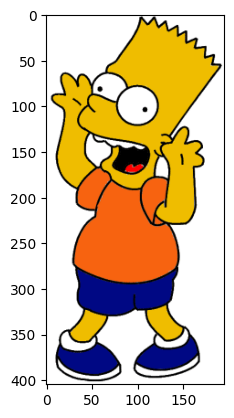

In [ ]:
bart = cv2.imread("/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/test_set/bart/bart12.bmp")
bart = cv2.cvtColor(bart, cv2.COLOR_BGR2RGB)
plt.imshow(bart)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/225,
                               shear_range=0.2,
                               zoom_range =0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

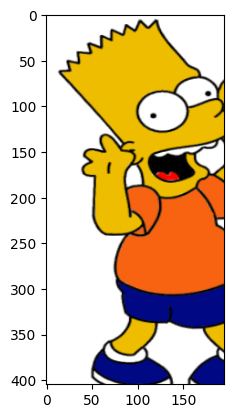

In [ ]:
plt.imshow(image_gen.random_transform(bart))

In [ ]:
batch_size = 32
validation_dataset = image_gen.flow_from_directory('/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/test_set',target_size=(244,244))
train_dataset = image_gen.flow_from_directory('/content/drive/MyDrive/CVR Lab/homer_bart_2 (1)/training_set',target_size=(244,244))

Found 54 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
image_shape = (150, 150, 3)

In [ ]:
image_shape[:2]

(150, 150)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = VGG16(input_shape = (244,244,3),
                                include_top =False,
                                weights ='imagenet')

# freeze the base model so its weight does not change during training
base_model.trainable = False

#Add custom Layers on top of the pre-trained model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#compile the model
model.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 5,verbose=2,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 2)

In [ ]:
epochs = 50
results = model.fit(train_dataset,
                    epochs = epochs, validation_data = validation_dataset,
                    callbacks = [early_stopping,model_checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4704 - loss: 2.4715
Epoch 1: val_accuracy improved from -inf to 0.51852, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 162s 13s/step - accuracy: 0.4790 - loss: 2.4278 - val_accuracy: 0.5185 - val_loss: 1.3442
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6804 - loss: 1.0549
Epoch 2: val_accuracy improved from 0.51852 to 0.85185, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 48s 477ms/step - accuracy: 0.6837 - loss: 1.0311 - val_accuracy: 0.8519 - val_loss: 0.4702
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7689 - loss: 0.5267
Epoch 3: val_accuracy did not improve from 0.85185
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.7763 - loss: 0.5179 - val_accuracy: 0.7963 - val_loss: 0.3842
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9207 - loss: 0.2775
Epoch 4: val_accuracy did not improve from 0.85185
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - accuracy: 0.9

In [ ]:
model.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 360ms/step - accuracy: 0.8492 - loss: 0.3149


[0.2939172685146332, 0.8518518805503845]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

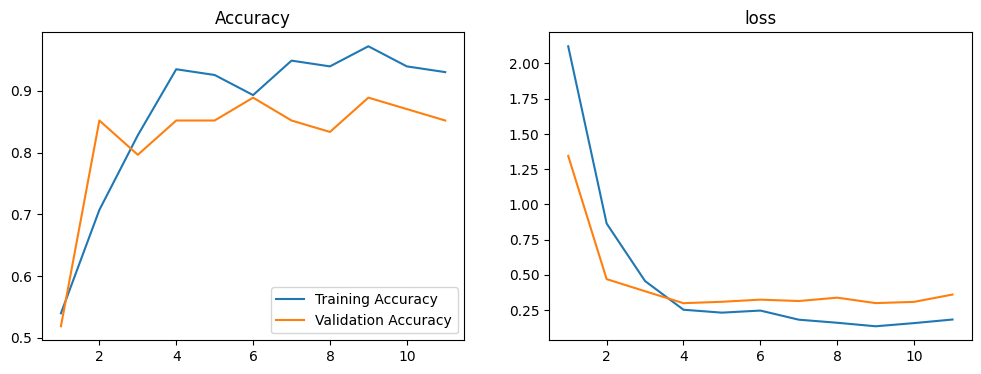

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

# **Task:**

ResNet50

ResNet50 is a convolutional neural network architecture that is 50 layers deep. It was introduced in the paper "Deep Residual Learning for Image Recognition" by Kaiming He et al. in 2015. The key innovation of ResNet is the use of residual connections, which allow the gradient to flow through the network without vanishing. This makes it easier to train very deep networks. ResNet50 consists of convolutional layers, batch normalization, ReLU activation functions, and identity shortcut connections, enabling the model to learn complex features while preventing overfitting. It is widely used for image classification tasks and serves as a backbone in various computer vision applications.

InceptionV3

InceptionV3 is a deep convolutional neural network architecture that builds on the Inception module concept introduced in previous versions. This model is designed to capture multi-scale features through its unique architecture, which includes various convolutional filter sizes applied in parallel. The InceptionV3 architecture incorporates techniques like factorized convolutions, asymmetric convolutions, and dimensionality reduction, enhancing its efficiency and performance. It also employs auxiliary classifiers for improved gradient flow during training. InceptionV3 is known for its ability to achieve high accuracy in image classification tasks while maintaining a relatively small computational footprint, making it suitable for real-time applications.

MobileNetV2

MobileNetV2 is an efficient convolutional neural network architecture designed specifically for mobile and embedded vision applications. It improves upon its predecessor, MobileNetV1, by introducing linear bottlenecks and inverted residuals, which enhance performance while reducing the number of parameters. The model uses depthwise separable convolutions, which split the convolution operation into two steps, significantly lowering computational costs without sacrificing accuracy. MobileNetV2 is lightweight and optimized for speed and efficiency, making it ideal for applications where resources are limited, such as mobile devices and IoT systems. It achieves a good balance between performance and efficiency, making it suitable for real-time inference tasks.

In [ ]:
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2

### Homer-Bart

### Homer-Bart ResNet50

In [ ]:
base_model_2 = ResNet50(input_shape = (244,244,3),
                                include_top =False,
                                weights ='imagenet')

# freeze the base model so its weight does not change during training
base_model_2.trainable = False

#Add custom Layers on top of the pre-trained model
model_2 = models.Sequential([
    base_model_2,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
#compile the model
model_2.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 5,verbose=2,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model_2.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 2)

In [ ]:
epochs = 50
results = model_2.fit(train_dataset,
                    epochs = epochs, validation_data = (validation_dataset),
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.5988 - loss: 24.1415

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.48148, saving model to best_model_2.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step - accuracy: 0.5972 - loss: 24.1551 - val_accuracy: 0.4815 - val_loss: 10.2649
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4933 - loss: 10.5976
Epoch 2: val_accuracy did not improve from 0.48148
7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - accuracy: 0.4968 - loss: 10.6331 - val_accuracy: 0.4815 - val_loss: 7.5012
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4104 - loss: 12.0530
Epoch 3: val_accuracy improved from 0.48148 to 0.51852, saving model to best_model_2.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4179 - loss: 11.8326 - val_accuracy: 0.5185 - val_loss: 10.2816
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5297 - loss: 6.6221
Epoch 4: val_accuracy improved from 0.51852 to 0.70370, saving model to best_model_2.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5274 - loss: 6.3526 - val_ac

In [ ]:
model_2.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step - accuracy: 0.6632 - loss: 0.6412


[0.6428200006484985, 0.6666666865348816]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

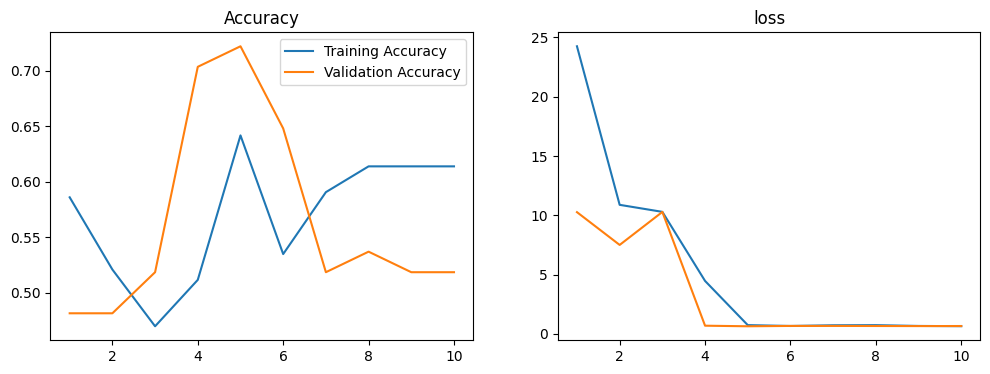

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

### Homer-Bart InceptionV3

In [ ]:
base_model_3 = InceptionV3(input_shape = (244,244,3),
                                include_top =False,
                                weights ='imagenet')

# freeze the base model so its weight does not change during training
base_model_3.trainable = False

#Add custom Layers on top of the pre-trained model
model_3 = models.Sequential([
    base_model_3,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#compile the model
model_3.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 5,verbose=2,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model_3.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 2)

In [ ]:
epochs = 50
results = model_3.fit(train_dataset,
                    epochs = epochs, validation_data = validation_dataset,
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5689 - loss: 5.8806
Epoch 1: val_accuracy improved from -inf to 0.74074, saving model to best_model_3.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5722 - loss: 5.9118 - val_accuracy: 0.7407 - val_loss: 1.8900
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7712 - loss: 3.0713
Epoch 2: val_accuracy improved from 0.74074 to 0.79630, saving model to best_model_3.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 862ms/step - accuracy: 0.7684 - loss: 3.0418 - val_accuracy: 0.7963 - val_loss: 1.1891
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8165 - loss: 1.4093
Epoch 3: val_accuracy improved from 0.79630 to 0.83333, saving model to best_model_3.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 986ms/step - accuracy: 0.8162 - loss: 1.3872 - val_accuracy: 0.8333 - val_loss: 0.9307
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8203 - loss: 1.0334
Epoch 4: val_accuracy improved from 0.83333 to 0.85185,

In [ ]:
model_3.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.8700 - loss: 0.3824


[0.3938959538936615, 0.8518518805503845]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

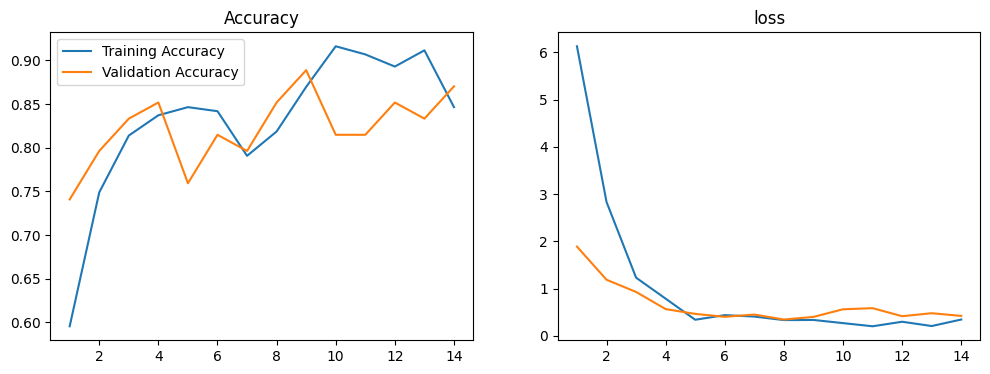

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

### Homer-Bart MobileNetV2

In [ ]:
base_model_4 = MobileNetV2(input_shape = (244,244,3),
                                include_top =False,
                                weights ='imagenet')

# freeze the base model so its weight does not change during training
base_model_4.trainable = False

#Add custom Layers on top of the pre-trained model
model_4 = models.Sequential([
    base_model_4,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')
])

<ipython-input-35-cab17278bcd7>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_4 = MobileNetV2(input_shape = (244,244,3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#compile the model
model_4.compile(optimizer ='adam',
              loss ='binary_crossentropy',
              metrics =['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience= 5,verbose=2,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model_4.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 2)

In [ ]:
epochs = 50
results = model_4.fit(train_dataset,
                    epochs = epochs, validation_data = validation_dataset,
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6075 - loss: 11.7270
Epoch 1: val_accuracy improved from -inf to 0.81481, saving model to best_model_4.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.6370 - loss: 11.0798 - val_accuracy: 0.8148 - val_loss: 3.6013
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9170 - loss: 2.1862
Epoch 2: val_accuracy improved from 0.81481 to 0.83333, saving model to best_model_4.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 604ms/step - accuracy: 0.9164 - loss: 2.2441 - val_accuracy: 0.8333 - val_loss: 4.6916
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9155 - loss: 1.6531
Epoch 3: val_accuracy did not improve from 0.83333
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - accuracy: 0.9138 - loss: 1.6904 - val_accuracy: 0.8148 - val_loss: 3.4599
Epoch 4/50
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9369 - loss: 0.6178
Epoch 4: val_accuracy did not improve from 0.83333
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - ac

In [ ]:
model_4.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.7951 - loss: 1.5246


[1.2408143281936646, 0.8333333134651184]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

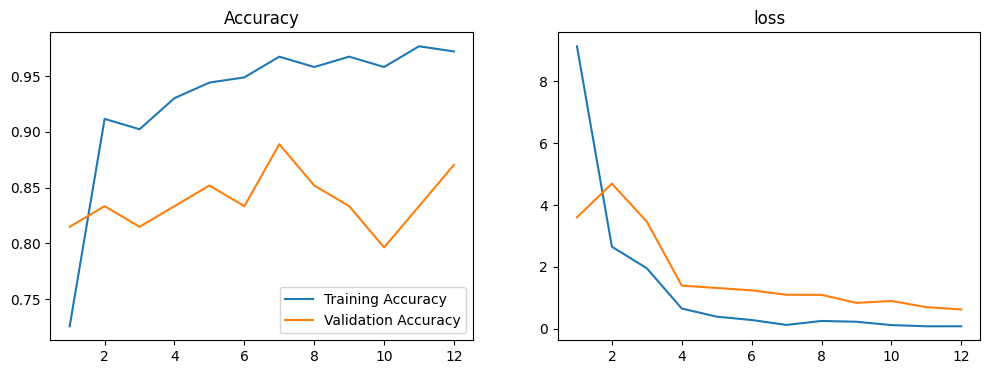

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

### Cifar-10 Task

### Cifar-10 ResNet50

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_images = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_images

In [ ]:
x_train = preprocess_image_input(x_train)
x_test = preprocess_image_input(x_test)

In [ ]:
# Feature Extraction is performed by ResNet50 pretrained on imagenet weights.
# Input size is 224 x 224.
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

resize = tf.keras.layers.UpSampling2D(size=(7, 7))(inputs)

# Using ResNet50 for feature extraction
feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                                          include_top=False,
                                                          weights='imagenet')(resize)

# Defines final dense layers and subsequent softmax layer for classification
x = tf.keras.layers.GlobalAveragePooling2D()(feature_extractor)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
classification_output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)


In [ ]:
model_5 = tf.keras.Model(inputs=inputs, outputs=classification_output)

In [ ]:
# Compile the model
model_5.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 2,verbose=1,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model_5.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 1)

In [ ]:
epochs = 8
results = model_5.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = epochs,
                    batch_size = 64,
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.7519 - loss: 0.7571
Epoch 1: val_accuracy improved from -inf to 0.92110, saving model to best_model_5.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 495s 579ms/step - accuracy: 0.7520 - loss: 0.7566 - val_accuracy: 0.9211 - val_loss: 0.2276
Epoch 2/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9654 - loss: 0.1091
Epoch 2: val_accuracy improved from 0.92110 to 0.93370, saving model to best_model_5.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 450s 549ms/step - accuracy: 0.9654 - loss: 0.1091 - val_accuracy: 0.9337 - val_loss: 0.2024
Epoch 3/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9901 - loss: 0.0384
Epoch 3: val_accuracy improved from 0.93370 to 0.94740, saving model to best_model_5.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 424s 526ms/step - accuracy: 0.9901 - loss: 0.0384 - val_accuracy: 0.9474 - val_loss: 0.1660
Epoch 4/8
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9962 - loss: 0.0154
Epoch 4: val_accura

In [ ]:
model_5.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9545 - loss: 0.1707


[0.17130303382873535, 0.9545000195503235]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

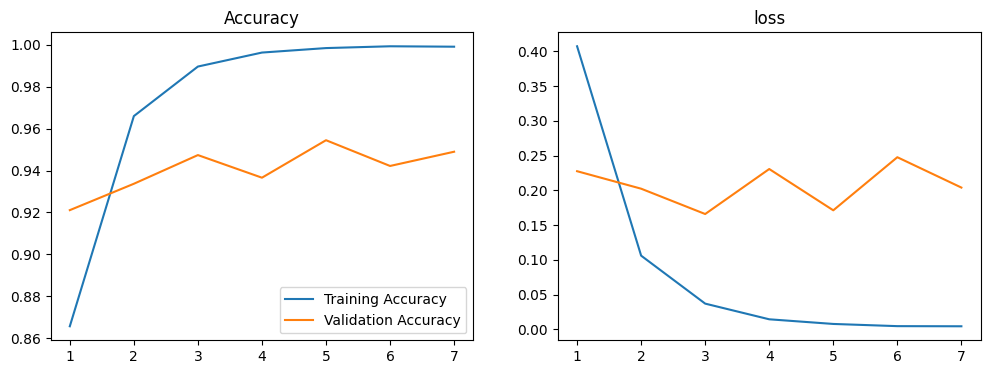

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

### Cifar-10 InceptionV3

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
def preprocess_data(X, Y):
    """
    Method:
        pre-processes the data for your model.
    """
    X_p = tf.keras.applications.inception_v3.preprocess_input(X)
    Y_p = tf.keras.utils.to_categorical(Y, 10)

    return X_p, Y_p

x_train_p, y_train_p = preprocess_data(x_train, y_train)
x_test_p, y_test_p = preprocess_data(x_test, y_test)

In [ ]:
base_model_6 = InceptionV3(include_top=False,
                             input_shape=(299, 299, 3))

input_layer = Input(shape=(32, 32, 3))

resizing_layer = Lambda(lambda image:
                keras.preprocessing.image.smart_resize(image,
                (299, 299)))(input_layer)

inception_layers = base_model_6(resizing_layer, training=False)

glob_pooling = GlobalAveragePooling2D()(inception_layers)
layer_i = Dense(500, activation='relu')(glob_pooling)
dropout_layer = Dropout(0.3)(layer_i)
output_layer =  Dense(10, activation='softmax')(dropout_layer)

base_model_6.trainable = False

model_6 = Model(inputs=input_layer, outputs=output_layer)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Compile the model
model_6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 5,verbose=2,restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model_6.keras',
    monitor ='val_accuracy',
    save_best_only =True,
    verbose = 1)

In [ ]:
# Train the model
epochs = 10
results = model_6.fit(x_train_p, y_train_p,
                      validation_data = (x_test_p, y_test_p),
                      epochs=epochs,
                      batch_size=300,
                      callbacks = [early_stopping, model_checkpoint])

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7262 - loss: 0.8478   
Epoch 1: val_accuracy improved from -inf to 0.86110, saving model to best_model_6.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.7267 - loss: 0.8462 - val_accuracy: 0.8611 - val_loss: 0.4046
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.8645 - loss: 0.3996
Epoch 2: val_accuracy improved from 0.86110 to 0.86260, saving model to best_model_6.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.8645 - loss: 0.3995 - val_accuracy: 0.8626 - val_loss: 0.3933
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.8751 - loss: 0.3593
Epoch 3: val_accuracy improved from 0.86260 to 0.87560, saving model to best_model_6.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8751 - loss: 0.3593 - val_accuracy: 0.8756 - val_loss: 0.3649
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.8869 - loss: 0.3299
Epoch 4: val_accuracy im

In [ ]:
model_6.evaluate(x_test_p, y_test_p)

313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - accuracy: 0.8882 - loss: 0.3448


[0.3497140109539032, 0.885200023651123]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

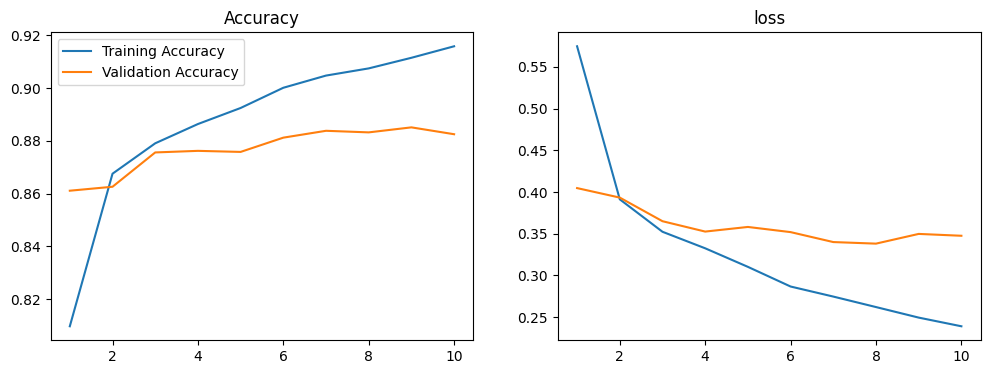

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

### Cifar-10 MobileNetV2

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
#Data Normalization
x_train, x_test = x_train / 255, x_test / 255

In [ ]:
base_model_7 = MobileNetV2(input_shape=(32, 32, 3),
                           include_top=False,
                           weights='imagenet')

base_model_7.trainable = True

for layer in base_model_7.layers[:100]:
  layer.trainable =  False

model_7 = Sequential([base_model_7,
                      layers.GlobalMaxPooling2D(),
                      layers.Dense(units=10, activation='softmax')])

<ipython-input-6-c48e9850c275>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_7 = MobileNetV2(input_shape=(32, 32, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Compile the model
model_7.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy', patience= 4,verbose=1,restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model_7.keras',
                                   monitor ='val_accuracy',
                                   save_best_only =True,
                                   verbose = 1)

In [ ]:
epochs = 15
results = model_7.fit(x_train, y_train,
                validation_data=(x_test, y_test),
                epochs=epochs,
                callbacks = [early_stopping, model_checkpoint])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4470 - loss: 1.7019
Epoch 1: val_accuracy improved from -inf to 0.39420, saving model to best_model_7.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - accuracy: 0.4471 - loss: 1.7017 - val_accuracy: 0.3942 - val_loss: 2.4733
Epoch 2/15
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5947 - loss: 1.2941
Epoch 2: val_accuracy improved from 0.39420 to 0.52590, saving model to best_model_7.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5947 - loss: 1.2940 - val_accuracy: 0.5259 - val_loss: 2.6315
Epoch 3/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6400 - loss: 1.1198
Epoch 3: val_accuracy improved from 0.52590 to 0.63450, saving model to best_model_7.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6400 - loss: 1.1198 - val_accuracy: 0.6345 - val_loss: 1.8400
Epoch 4/15
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6612 - loss: 1.0571
Epoch 4: val_ac

In [ ]:
model_7.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6328 - loss: 1.8430


[1.839967131614685, 0.6345000267028809]

In [ ]:
accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

<function matplotlib.pyplot.legend(*args, **kwargs)>

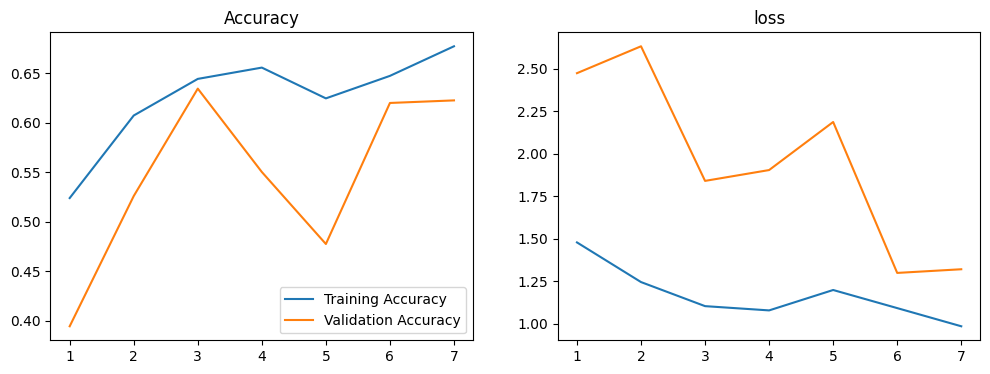

In [ ]:
trained_epochs = len(results.history['accuracy'])
#plot accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, trained_epochs +1), accuracy, label='Training Accuracy')
plt.plot(range(1, trained_epochs +1), val_accuracy, label='Validation Accuracy')
plt.title('accuracy curve')
plt.title("Epochs")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, trained_epochs +1), loss, label='loss Accuracy')
plt.plot(range(1, trained_epochs +1), val_loss, label='Validation loss')
plt.title('loss curve')
plt.title("Epochs")
plt.title("loss")
plt.legend

# **Conclusion:**

ResNet50 provides high accuracy but is resource-intensive, InceptionV3 balances efficiency and performance, while MobileNetV2 is lightweight and best suited for resource-constrained environments, though with slightly lower accuracy. The choice of model depends on the trade-off between performance and computational efficiency.